Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#gives descriptive statistics for all columns
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Filling null values

In [6]:
df['children']=df['children'].fillna(df['children'].mode().values[0])
df['agent']=df['agent'].fillna(df['agent'].mean())
df.drop('company',inplace=True,axis=1)

In [7]:
df['country']=df['country'].fillna(df['children'].mode().values[0])

In [8]:
duplicate=df.duplicated()
print(duplicate.sum())

32001


In [9]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,NaN,104641,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.221124,NaN,86.693382,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.652306,NaN,102.915247,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,1.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,9.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,28.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,NaN,152.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
# creating dummies

dummies = pd.get_dummies(df[['hotel','meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']],columns=['hotel','meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status'])


In [11]:
# making a copy of our dataframe

hotel_df = df.copy()

In [ ]:
#it converts categorical variables into numerical variables
##dummies.head()

In [12]:
columns = ['hotel','meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']
hotel_df = pd.concat([hotel_df,dummies],axis=1)
hotel_df.drop(columns,axis=1,inplace=True)

In [13]:
hotel_df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,July,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,July,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,July,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,July,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,1,0,0,0,0,1,0,0,1,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,1,0,0,0,0,1,0,0,1,0
119387,0,34,2017,August,35,31,2,5,2,0.0,...,1,0,0,0,0,1,0,0,1,0
119388,0,109,2017,August,35,31,2,5,2,0.0,...,1,0,0,0,0,1,0,0,1,0


In [14]:
df = df.drop(labels='days_in_waiting_list',axis=1) # We delete days_in_waiting_list column

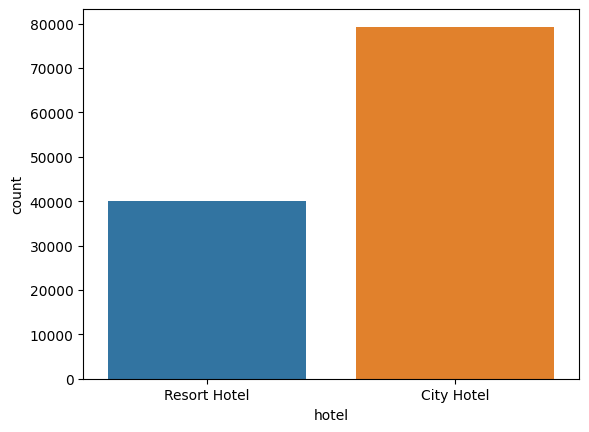

In [15]:
import seaborn as sns
sns.countplot(x='hotel',data=df)
plt.show()

As seen in the above Countplot we can say that resort hotel are booked less as compared to City hotel. This can due to short stay of people, close to city etc.

<Axes: xlabel='arrival_date_year', ylabel='count'>

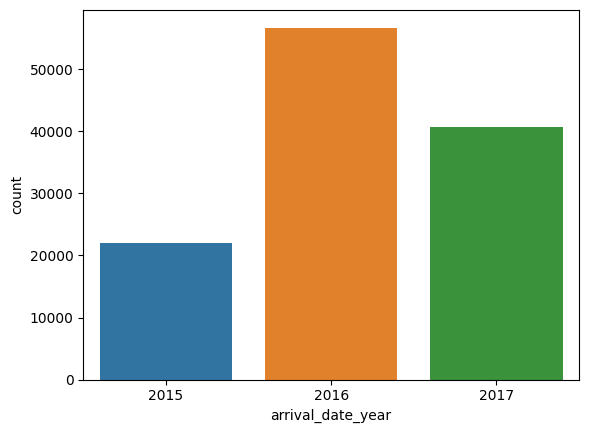

In [16]:
sns.countplot(x='arrival_date_year',data=df)

The arrivals were most in the year 2016 and least in the year 2015

<ipython-input-17-b395856ccf78>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-17-b395856ccf78>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-17-b395856ccf78>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

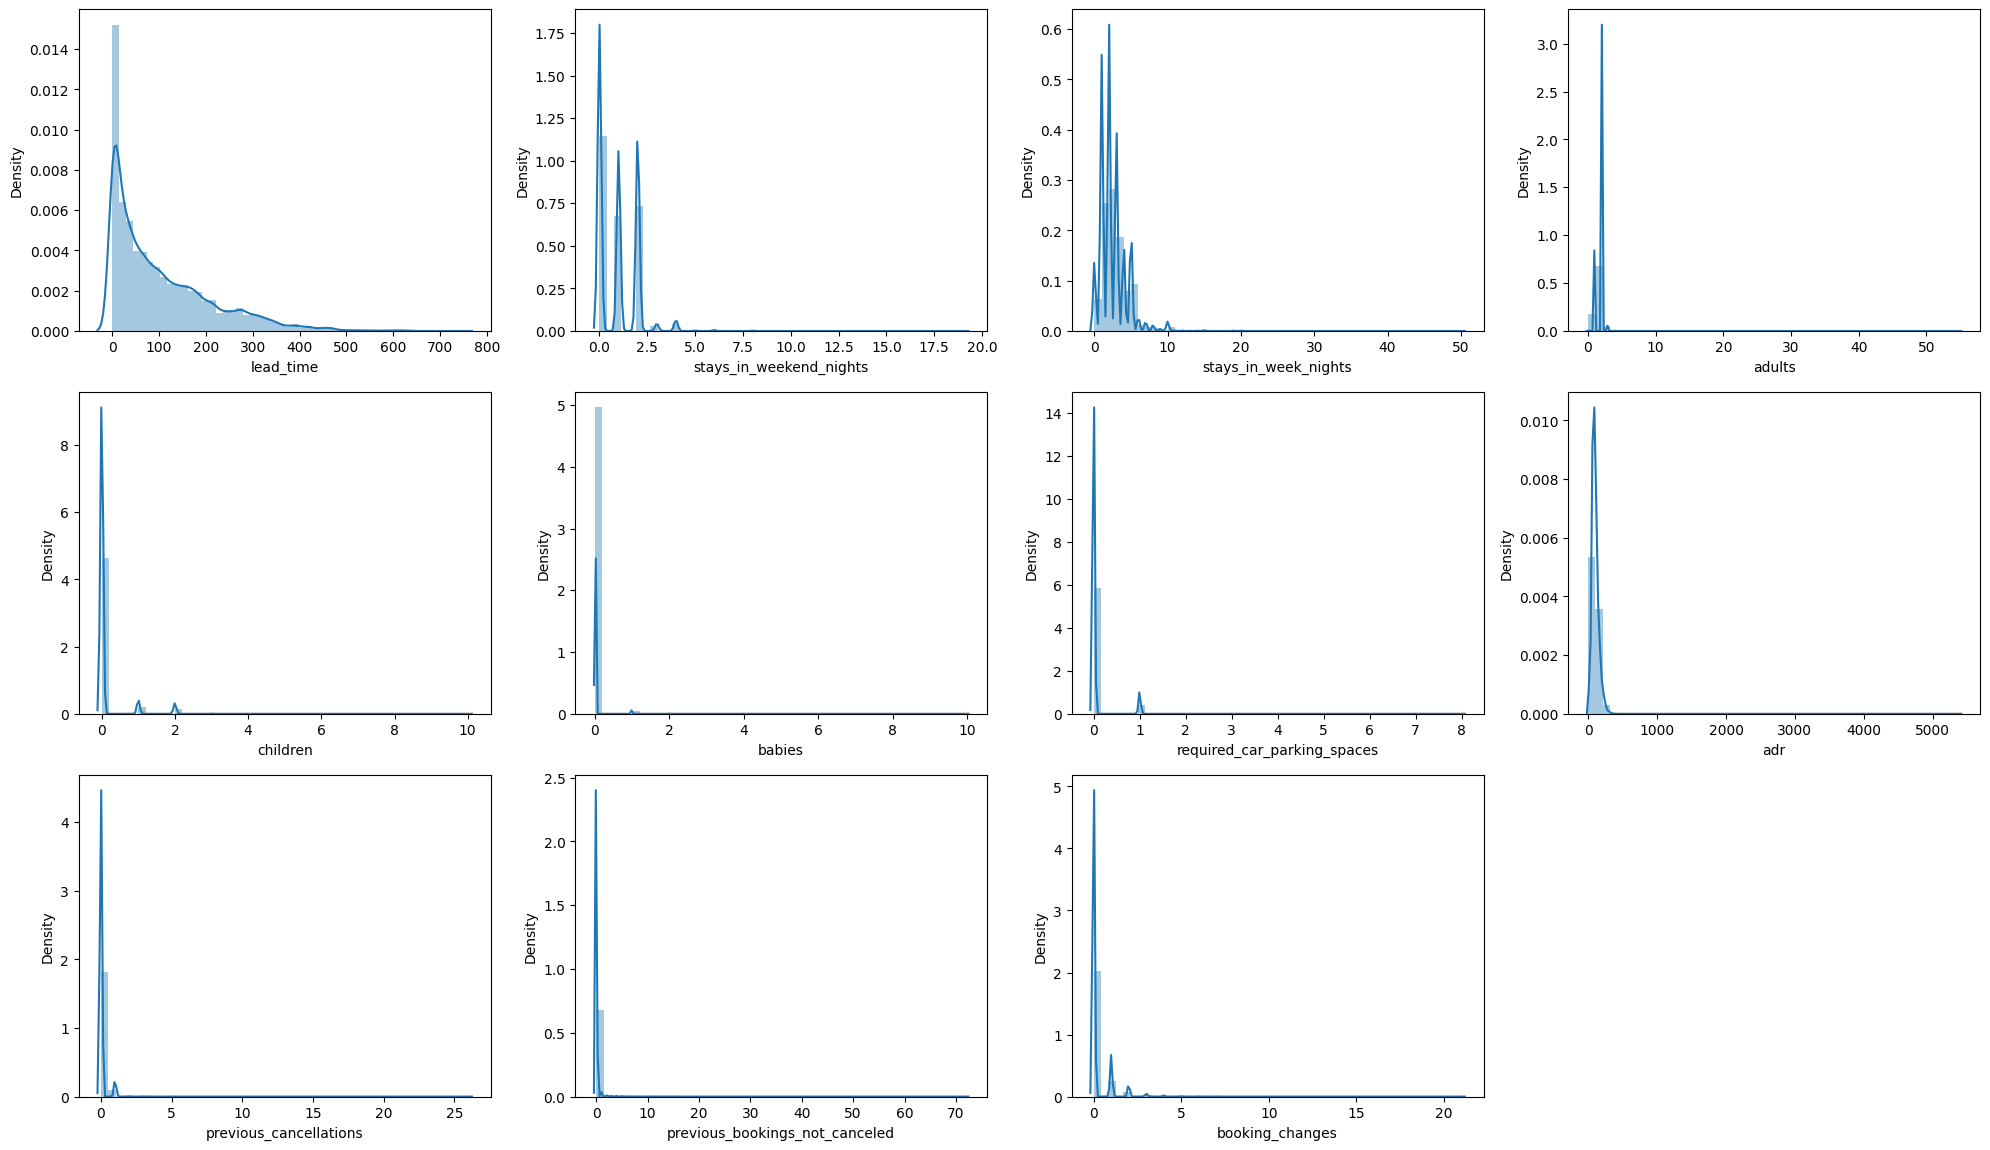

In [17]:
columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n=1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(4,4,n)
  n+=1
  sns.distplot(df[column])
  plt.tight_layout()

If the distribution is skewed then we use IQR method

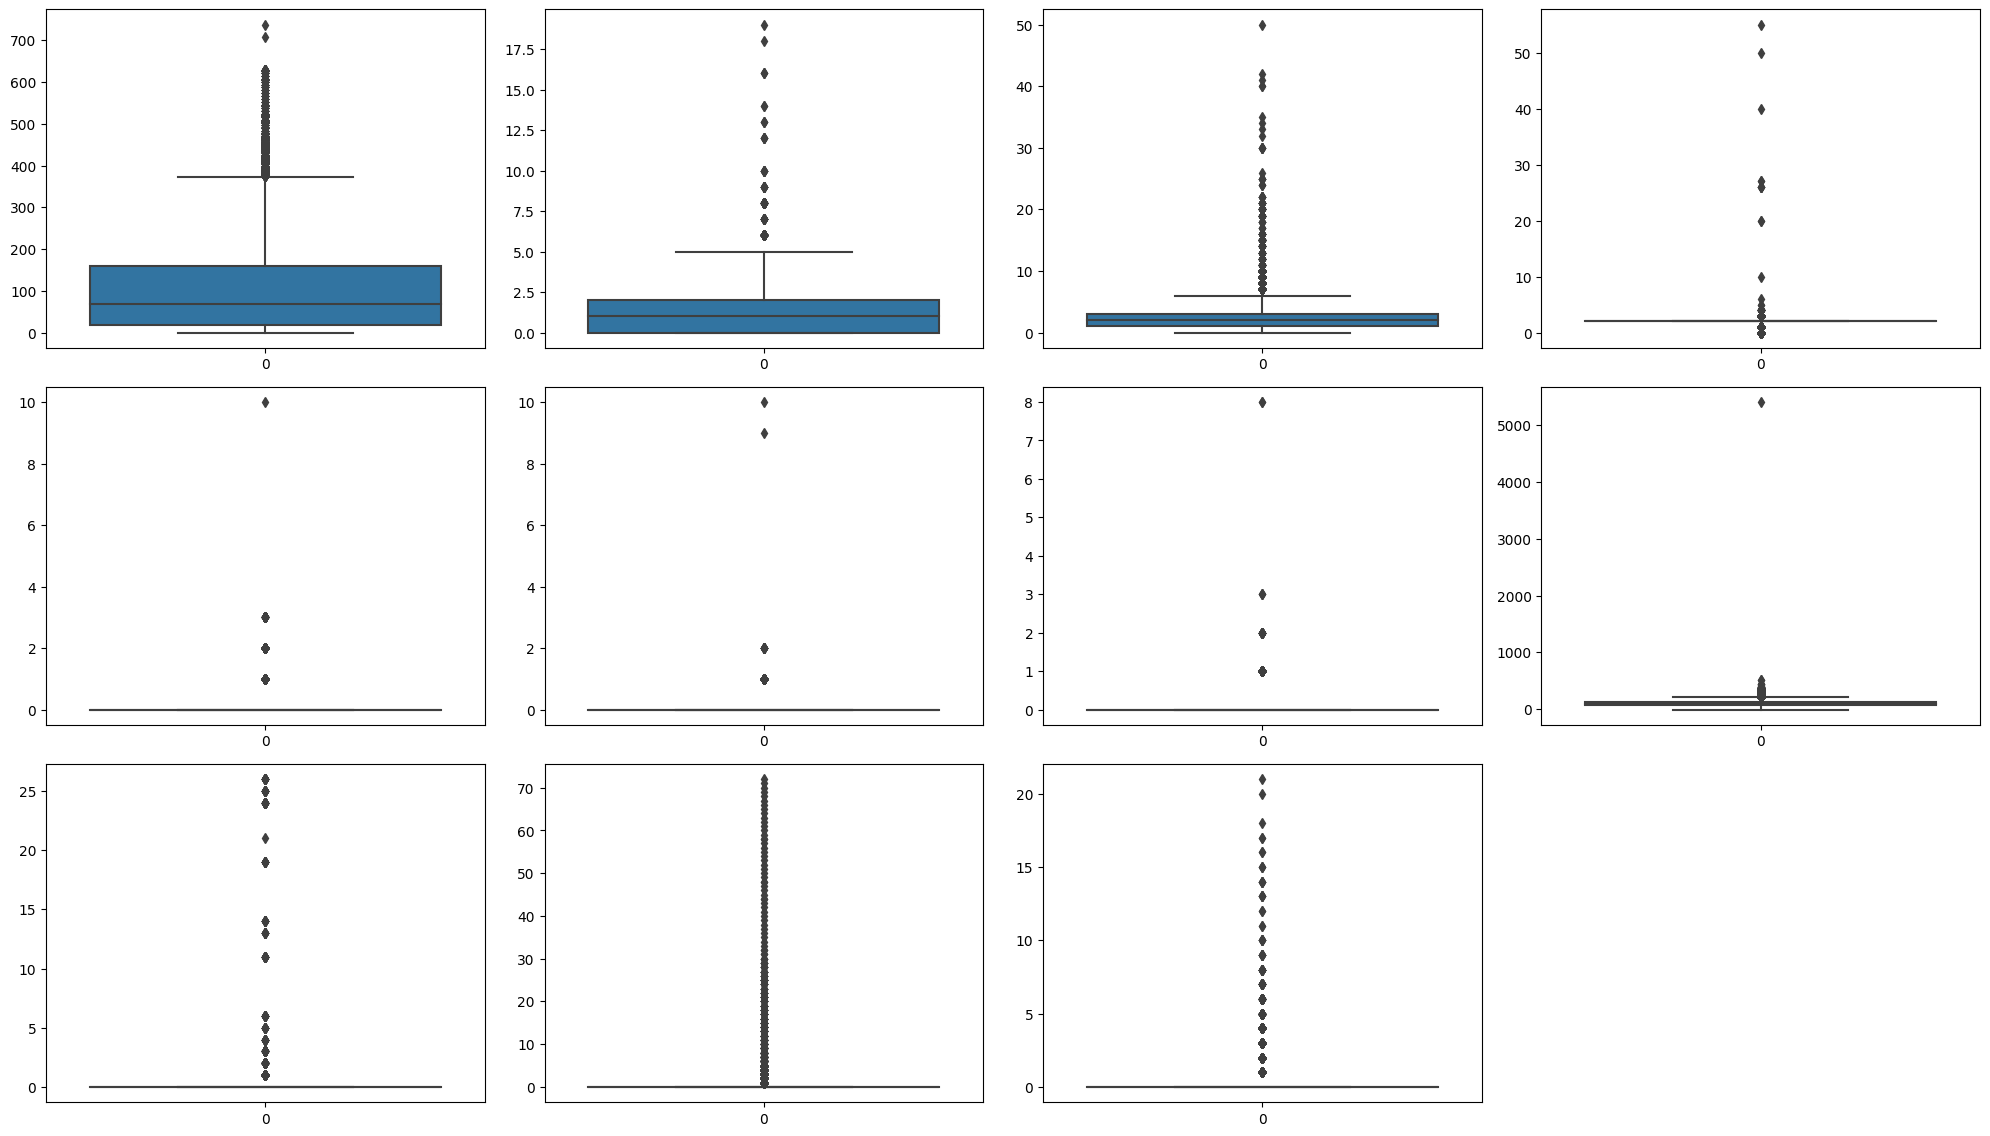

In [18]:
columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(4,4,n)
  n+=1
  sns.boxplot(df[column])
  plt.tight_layout()#prevents overlapping

In [19]:
df.loc[df.lead_time>500,'lead_time']=500
df.loc[df.stays_in_weekend_nights>=5,'stays_in_weekend_nights']=5
df.loc[df.adults>4,'adults']=4
df.loc[df.children>8,'children']=0
df.loc[df.babies>8,'babies']=0
df.loc[df.required_car_parking_spaces>5,'required_car_parking_spaces']=0
df.loc[df.adr>1000,'adr']=1000
df.loc[df.previous_cancellations>0,'previous_cancellations']=1
df.loc[df.previous_bookings_not_canceled>0,'previous_bookings_not_canceled']=1
df.loc[df.booking_changes>5,'booking_changes']=5

# Data Manipulation

In [20]:
df['kids']=df.children+df.babies
#combine total members by adding kids
df['total_members']=df.kids+df.adults
#convert the datatypes to string
df['arrival_date_year']=df['arrival_date_year'].astype('str')
df['arrival_date_month']=df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].astype('str')
df['is_canceled']=df['is_canceled'].astype('str')
df['is_repeated_guest']=df['is_repeated_guest'].astype('str')

In [21]:
#concat them
df['arrival_date']=df['arrival_date_day_of_month']+ '-'+ df['arrival_date_month']+ '-'+ df['arrival_date_year']
df['arrival_date']=pd.to_datetime(df['arrival_date'],errors='coerce')#converts into datetime object

In [24]:
confirmed_booking=df[df.is_canceled=='0']
confirmed_booking['arrival_date_month']=df['arrival_date'].dt.month
final=confirmed_booking['arrival_date_month'].value_counts().sort_index()
final

<ipython-input-24-7e85ecd0a099>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_booking['arrival_date_month']=df['arrival_date'].dt.month


1     4122
2     5372
3     6645
4     6565
5     7114
6     6404
7     7919
8     8638
9     6392
10    6914
11    4672
12    4409
Name: arrival_date_month, dtype: int64

In [26]:
df.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

<Axes: xlabel='is_canceled', ylabel='count'>

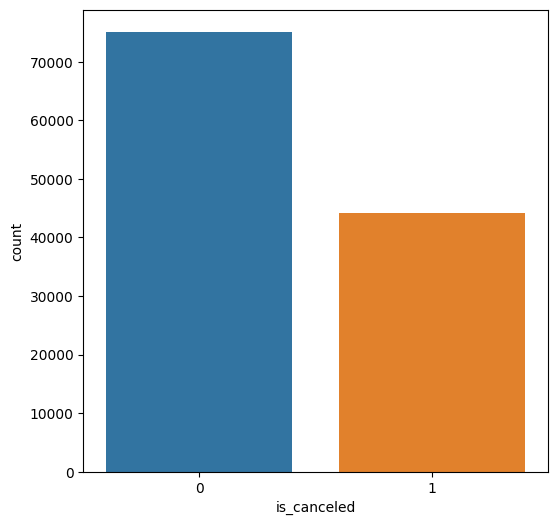

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_canceled',data=df)

# Now we will check months of arrival

In [30]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

<Axes: xlabel='arrival_date_month', ylabel='count'>

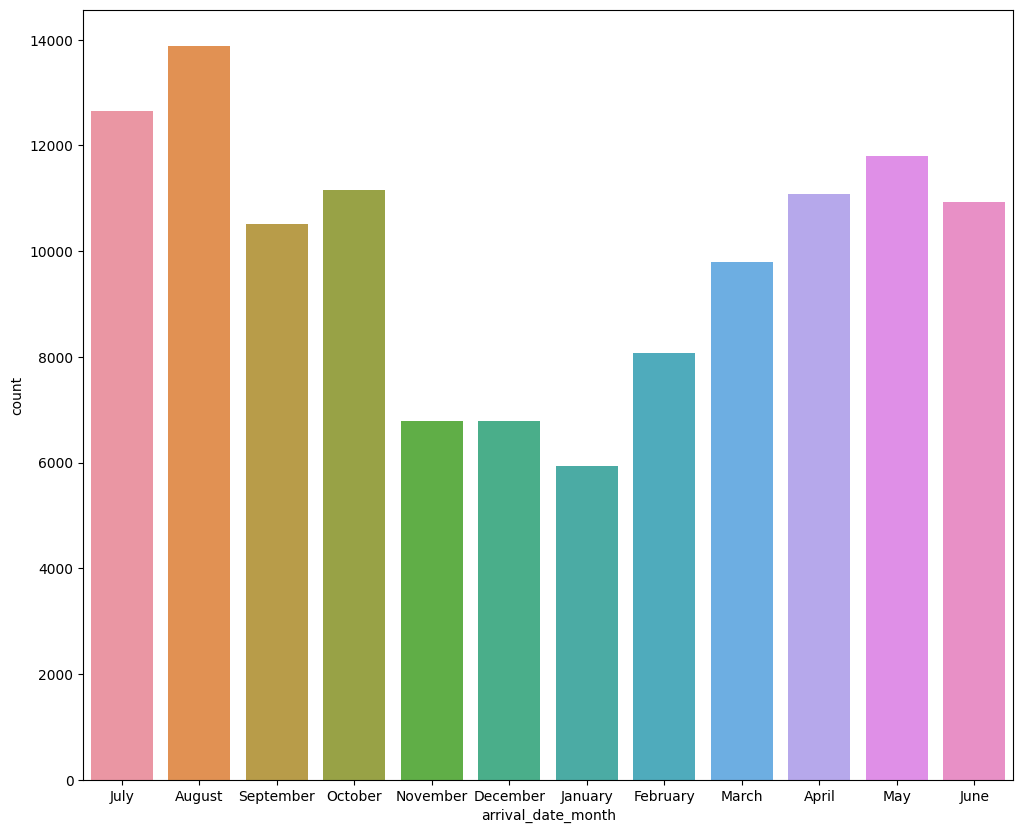

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(x='arrival_date_month',data=df)

## Now we will check market segment

In [38]:
df.market_segment.value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

<Axes: xlabel='market_segment', ylabel='count'>

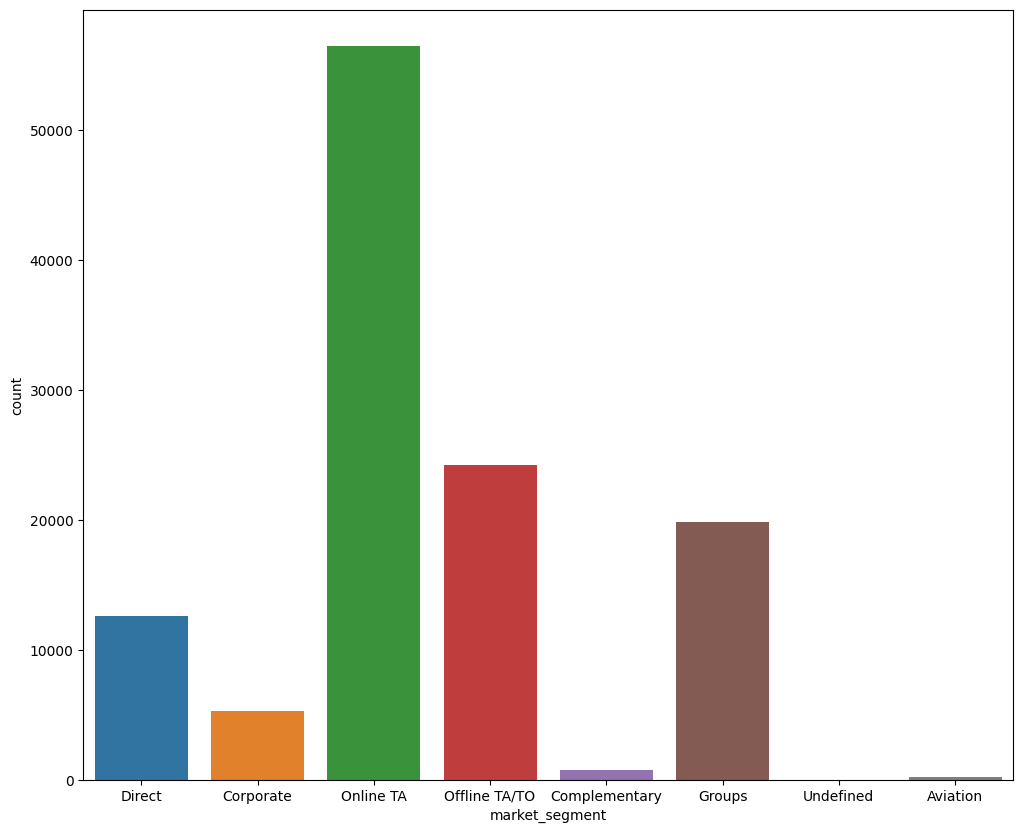

In [44]:
plt.figure(figsize=(12,10))
sns.countplot(x='market_segment',data=df)


# Now we will check year of arrival

In [45]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

<Axes: xlabel='arrival_date_year', ylabel='count'>

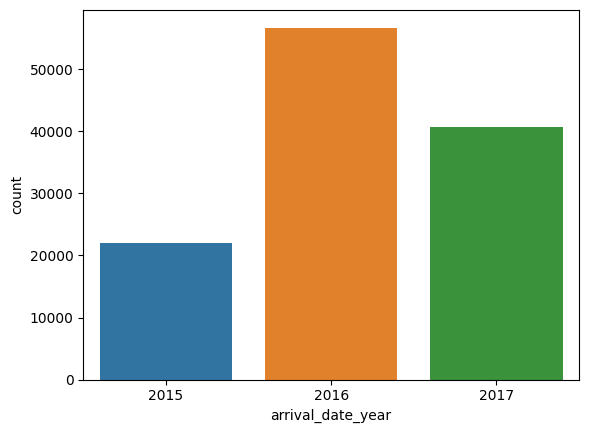

In [46]:
sns.countplot(x='arrival_date_year',data=df)

# Now we what kind meal consumers perferred

In [47]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

Undefined/SC — no meal package

BB — Bed & Breakfast

HB — Half board (breakfast and one other meal — usually dinner)

FB — Full board (breakfast, lunch and dinner)

<Axes: xlabel='meal', ylabel='count'>

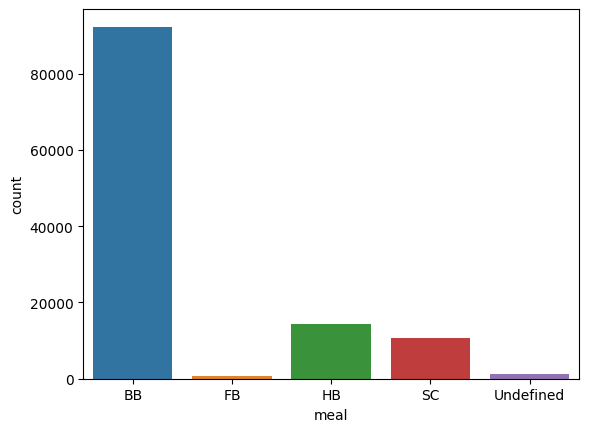

In [49]:
sns.countplot(x='meal',data=df)

Now we check consumers type

In [50]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

<Axes: xlabel='customer_type', ylabel='count'>

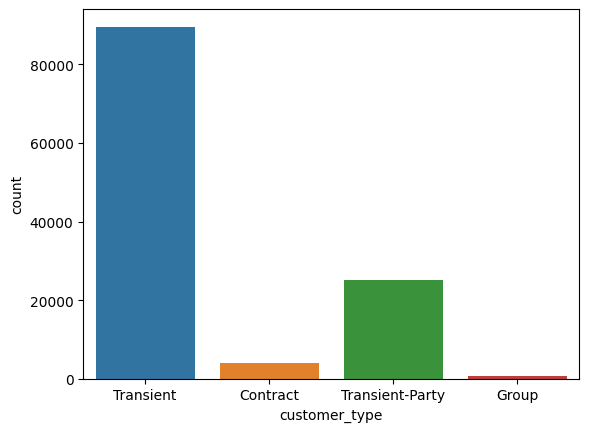

In [51]:
sns.countplot(x='customer_type',data=df)

The most common consumer type is Transient

# Now we will check type of room reserved

In [52]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

<Axes: xlabel='reserved_room_type', ylabel='count'>

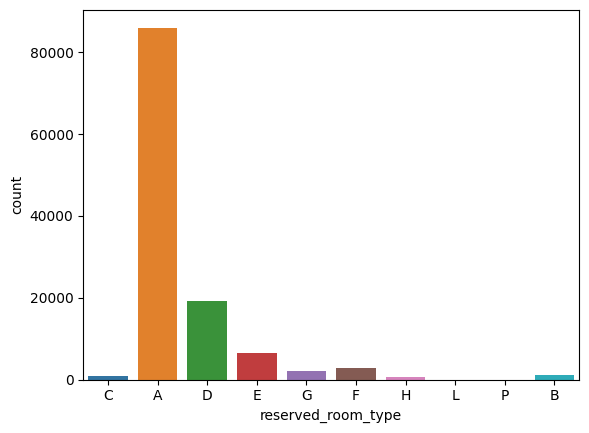

In [54]:
sns.countplot(x='reserved_room_type',data=df)

It seems, room type 'A' is mostly selected by customers.

# Now we will check which type of room is most assigned.

In [55]:
df.assigned_room_type.value_counts(normalize=True)

A    0.620261
D    0.212095
E    0.065382
F    0.031418
G    0.021384
C    0.019893
B    0.018117
H    0.005964
I    0.003040
K    0.002337
P    0.000101
L    0.000008
Name: assigned_room_type, dtype: float64

<Axes: xlabel='assigned_room_type', ylabel='count'>

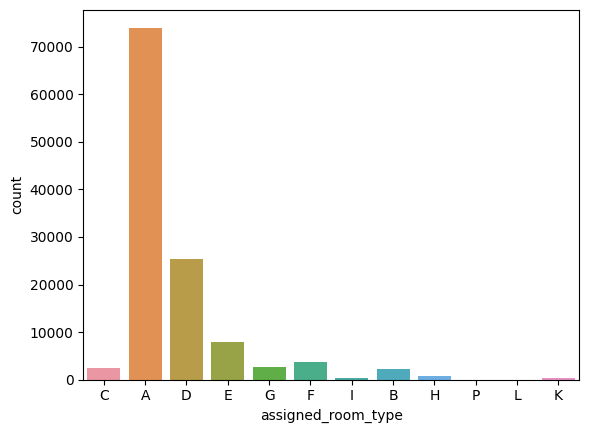

In [56]:
sns.countplot(x='assigned_room_type',data=df)


# Now we will check how many times are our guest repeated

In [57]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

<Axes: xlabel='is_repeated_guest', ylabel='count'>

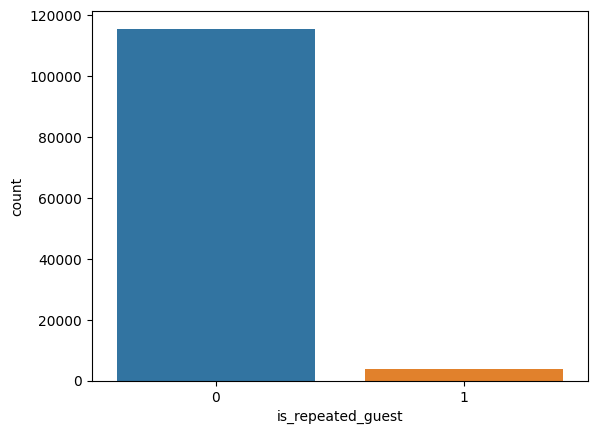

In [58]:
sns.countplot(x='is_repeated_guest',data=df)

([<matplotlib.patches.Wedge at 0x7a4b9a113970>,
 [Text(-1.09447652566627, 0.11009602520295811, '0'),
  Text(1.0944765295317447, -0.11009598677585064, '1')])

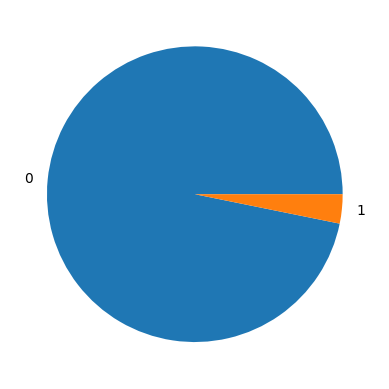

In [60]:
is_repeated=[0,1]
data=df.is_repeated_guest.value_counts(normalize=True)
plt.pie(data,labels=is_repeated)

# Now we will check type of deposit customer made.

In [61]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

<Axes: xlabel='deposit_type', ylabel='count'>

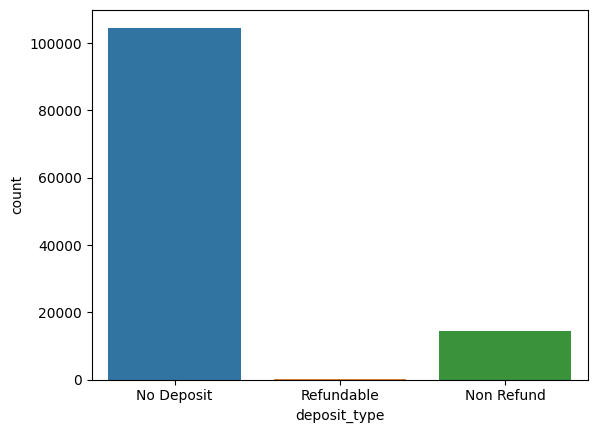

In [62]:
sns.countplot(x='deposit_type',data=df)

# Now we will check if customer needed car space. This might also be helpfull in knowing if they used a car as medium for travel.


In [63]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.937901
1    0.061839
2    0.000235
3    0.000025
Name: required_car_parking_spaces, dtype: float64

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

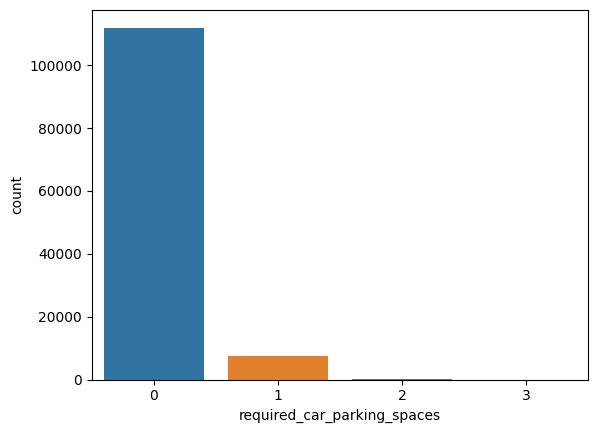

In [64]:
sns.countplot(x='required_car_parking_spaces',data=df)

# Now we will check total members per reservation

In [65]:
df.total_members.value_counts(normalize=True)

2.0    0.687269
1.0    0.189145
3.0    0.087905
4.0    0.033043
0.0    0.001508
5.0    0.001131
Name: total_members, dtype: float64

<Axes: xlabel='total_members', ylabel='count'>

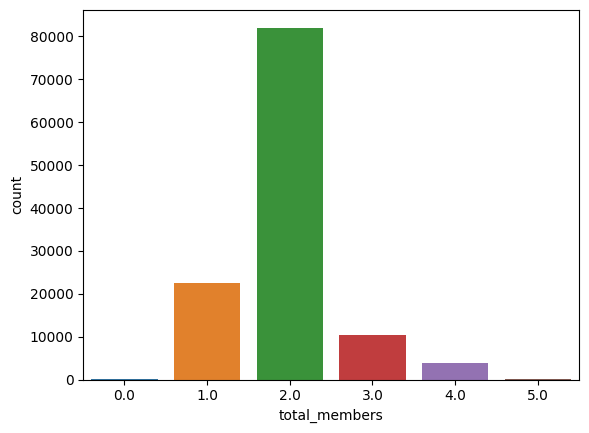

In [66]:
sns.countplot(x='total_members',data=df)

# Now we will check type/location of hotel preferred.

In [67]:
df.hotel.value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

<Axes: xlabel='hotel', ylabel='count'>

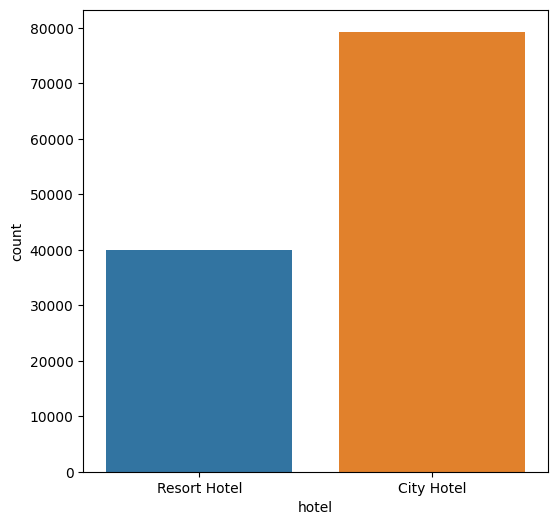

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(x='hotel',data=df)

### Conclusion



1. Portugal, Great Britain, and France are native place of most customers.
2. August is the MOST busiest month.
3.   Most of our customers were brought in by Online Travel Agents.
4. Bed and Breakfast is most preferred meal package.
5. In 2016, we had most customers considering overall customers whereas city hotel had more bookings compared to resort hotels.
6. Most of the time, people come in pairs.
7. Room Type A is MOST favourite room type among customers.




